# Build CNN Model for Classification Of Flowers

### Task 1:  Download the Dataset

The dataset succesfully downloaded

In [3]:
# import the libraries

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

### Task2:  Image Augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
#load my images data

In [10]:
x_train = train_datagen.flow_from_directory(r"E:\PROJECTS\ibm assignment\assignment3\flowers\training",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 3432 images belonging to 5 classes.


In [11]:
x_test = test_datagen.flow_from_directory(r"E:\PROJECTS\ibm assignment\assignment3\flowers\testing",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 885 images belonging to 5 classes.


In [12]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# Task 3 : Create Mode

In [13]:
#initialize the model

In [14]:
model = Sequential()

## Task 4 :Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [15]:
#add convolution layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [16]:
#add maxpooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
#flatten layer =>input layer to your ANN
model.add(Flatten())

In [18]:
#hidden layers

In [19]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [20]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [21]:
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))

In [22]:
#output layer

In [23]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

# Task 5:  Compile The Model

In [24]:
#compile the model

In [33]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Task 6: Fit The Model

In [26]:
#train the model

In [34]:
model.fit_generator(x_train,steps_per_epoch=107,epochs=30,validation_data=x_test,validation_steps=27)

C:\Users\gopin\AppData\Local\Temp\ipykernel_6448\3663072991.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=107,epochs=30,validation_data=x_test,validation_steps=27)


Epoch 1/30
107/107 [==============================] - 204s 2s/step - loss: 1.3474 - accuracy: 0.3979 - val_loss: 1.1717 - val_accuracy: 0.4850
Epoch 2/30
107/107 [==============================] - 52s 485ms/step - loss: 1.1743 - accuracy: 0.4938 - val_loss: 1.1250 - val_accuracy: 0.5660
Epoch 3/30
107/107 [==============================] - 49s 452ms/step - loss: 1.0672 - accuracy: 0.5629 - val_loss: 1.2977 - val_accuracy: 0.4676
Epoch 4/30
107/107 [==============================] - 50s 464ms/step - loss: 0.9997 - accuracy: 0.6068 - val_loss: 1.0616 - val_accuracy: 0.5868
Epoch 5/30
107/107 [==============================] - 49s 453ms/step - loss: 0.9717 - accuracy: 0.6182 - val_loss: 1.1829 - val_accuracy: 0.5382
Epoch 6/30
107/107 [==============================] - 51s 472ms/step - loss: 0.9324 - accuracy: 0.6353 - val_loss: 0.9365 - val_accuracy: 0.6447
Epoch 7/30
107/107 [==============================] - 48s 451ms/step - loss: 0.8801 - accuracy: 0.6515 - val_loss: 1.0832 - val_accu

# Task 7:  Save The Model

In [35]:
#save the model
model.save("flower.h5")

# Task 8: Test The Model

In [36]:
#testing model

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [66]:
img=image.load_img("sunflower.jpg",target_size=(64,64))

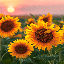

In [67]:
img

In [68]:
type(img)

PIL.Image.Image

In [69]:
x= image.img_to_array(img)

In [70]:
x

array([[[255., 216., 151.],
        [255., 221., 155.],
        [254., 219., 153.],
        ...,
        [255., 194., 175.],
        [255., 195., 176.],
        [255., 198., 174.]],

       [[255., 205., 154.],
        [255., 207., 151.],
        [255., 206., 148.],
        ...,
        [255., 191., 171.],
        [253., 192., 173.],
        [254., 196., 176.]],

       [[255., 186., 152.],
        [255., 193., 152.],
        [255., 192., 148.],
        ...,
        [255., 183., 168.],
        [255., 189., 170.],
        [255., 189., 172.]],

       ...,

       [[ 34.,  58.,  32.],
        [ 32.,  52.,  25.],
        [ 34.,  49.,  20.],
        ...,
        [ 55.,  78.,   8.],
        [ 50.,  75.,  10.],
        [ 65.,  90.,  22.]],

       [[ 31.,  50.,  28.],
        [ 28.,  50.,  27.],
        [ 40.,  55.,  24.],
        ...,
        [ 58.,  78.,  15.],
        [ 45.,  64.,   9.],
        [ 57.,  74.,  20.]],

       [[ 35.,  51.,  24.],
        [ 31.,  51.,  23.],
        [ 30.,  

In [71]:
x.shape

(64, 64, 3)

In [72]:
x = np.expand_dims(x,axis=0)

In [73]:
x.shape

(1, 64, 64, 3)

In [74]:
pred_prob = model.predict(x)

1/1 [==============================] - 0s 109ms/step


In [75]:
pred_prob

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [76]:
class_name=["daisy","dandelion","rose","sunflower","tulip"]
pred_id = pred_prob.argmax(axis=1)[0]

In [77]:
pred_id

3

In [78]:
print("predited flower is ",str(class_name[pred_id]))

predited flower is  sunflower
